In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

plt.rc('font', family = "gulim")
plt.rc('axes', unicode_minus = False)

In [3]:
from sklearn.linear_model import LinearRegression

In [39]:
mtcars = pd.read_excel(r"C:\Users\user\Desktop\pandas, seaborn\dataset\mtcars.xlsx")
mtcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [40]:
## training set 나누기 
train_X = mtcars.loc[:, "cyl":"qsec"] # 대문자로 X 쓰면 matrix 
train_y = mtcars.loc[:, "mpg"]

print(train_X.head())
print(train_y.head())

print("")

   cyl   disp   hp  drat     wt   qsec
0    6  160.0  110  3.90  2.620  16.46
1    6  160.0  110  3.90  2.875  17.02
2    4  108.0   93  3.85  2.320  18.61
3    6  258.0  110  3.08  3.215  19.44
4    8  360.0  175  3.15  3.440  17.02
0    21.0
1    21.0
2    22.8
3    21.4
4    18.7
Name: mpg, dtype: float64



In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
lr = LinearRegression()
# LinearRegression 함수를 호출하여 선형 회귀 모델의 인스턴스를 생성 
lr.fit(train_X, train_y) # 모델을 훈련 데이터에 맞춘다. 

LinearRegression()

In [43]:
print("Train R-square = ", round(lr.score(train_X, train_y)))

Train R-square =  1


In [44]:
lr.coef_ #LinearRegression 모델에서 학습된 특성들의 계수를 나타내는 속성
train_X.columns 
# train_X.columns : pandas DataFrame의 속성으로 훈련 데이터셋의 특성의 이름을 나타냄ㅁ
coeff_df = pd.DataFrame(lr.coef_, index=  train_X.columns, columns = ["coefficient"])
print(coeff_df)

      coefficient
cyl     -0.818560
disp     0.013205
hp      -0.017930
drat     1.320406
wt      -4.190832
qsec     0.401461


## KNN (k-nearest neigbors classifier)

In [5]:
# 도미자료
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

# 방어자료
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


In [7]:
print("도미 무게 = {: .4f}, 길이 = {:.4f}".format(np.mean(bream_weight), np.mean(bream_length)))
print("방어 무게 = {:.4f}, 길이 = {:.4f}".format(np.mean(smelt_weight), np.mean(smelt_length)))

도미 무게 =  617.8286, 길이 = 33.1086
방어 무게 = 11.1786, 길이 = 11.9214


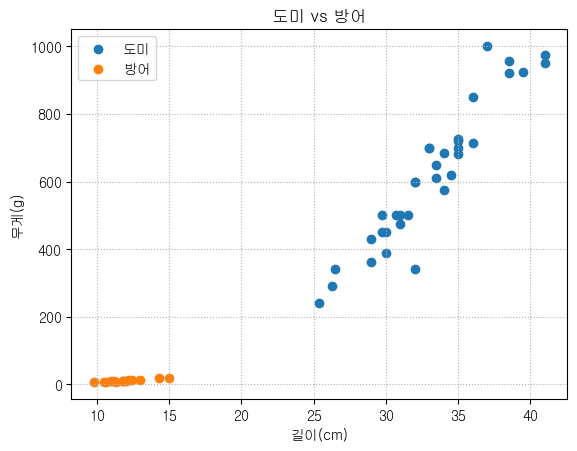

In [12]:
## Scatter plot 
plt.scatter(bream_length, bream_weight, label = "도미")
plt.scatter(smelt_length, smelt_weight, label = "방어")
plt.title("도미 vs 방어")
plt.xlabel("길이(cm)")
plt.ylabel("무게(g)")
plt.grid(linestyle = ":")
plt.legend()
plt.show()

In [20]:
## list 
length = bream_length + smelt_length ##리스트 뒤에 붙음
weight = bream_weight + smelt_weight 

print(np.shape(length))
print(np.shape(weight))

## x_2d
fish_data = np.column_stack([length, weight])
# np.column_stack() 
# : 1차원 배열들을 입력으로받아 이들을 열로 쌓아 2차원 배열을 만드는 기능
print(fish_data)
print(type(fish_data))
print(np.shape(fish_data))

(49,)
(49,)
[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]
<class 'numpy.ndarray'>
(49, 2)


In [22]:
len(bream_length)

35

In [26]:
## 
fish_target = np.append(np.ones(len(bream_length)), np.zeros(len(smelt_length)))
# np.ones(len(bream_length)): bream_length의 길이만큼 1로 채워진 배열을 생성합니다.
# np.zeros(len(smelt_length)): smelt_length의 길이만큼 0으로 채워진 배열을 생성합니다.
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [111]:
## KNN class
from sklearn.neighbors import KNeighborsClassifier
# KNeighborsClassifier
# scikit-learn 라이브러리에서 제공하는 k-최근접 이웃(KNN)분류 알고리즘

In [34]:
knn = KNeighborsClassifier(n_neighbors= 5,
                           weights = "uniform", 
                           metric = "minkowski",
                           p = 2 # 유클리디안으로 계산하겠다
                           # p = 1 : Manhattan 거리 L1 norm
                           # p = ∞: Chebyshev 거리
                           )
knn.fit(fish_data, fish_target)
print("Train ACC = ", knn.score(fish_data, fish_target))

## 1 = 적중률 100% 

Train ACC =  1.0


In [38]:
## Attribute
print("classes  = ", knn.classes_)
print("metrics = ", knn.effective_metric_ )
print("sample = ", knn.n_samples_fit_)

classes  =  [0. 1.]
metrics =  euclidean
sample =  49


In [45]:
## 
np.column_stack([fish_data, fish_target])
# np.column_stack() : 입력된 배열들을 열로 쌓아 새로운 2차원 배열을 생성 

array([[  25.4,  242. ,    1. ],
       [  26.3,  290. ,    1. ],
       [  26.5,  340. ,    1. ],
       [  29. ,  363. ,    1. ],
       [  29. ,  430. ,    1. ],
       [  29.7,  450. ,    1. ],
       [  29.7,  500. ,    1. ],
       [  30. ,  390. ,    1. ],
       [  30. ,  450. ,    1. ],
       [  30.7,  500. ,    1. ],
       [  31. ,  475. ,    1. ],
       [  31. ,  500. ,    1. ],
       [  31.5,  500. ,    1. ],
       [  32. ,  340. ,    1. ],
       [  32. ,  600. ,    1. ],
       [  32. ,  600. ,    1. ],
       [  33. ,  700. ,    1. ],
       [  33. ,  700. ,    1. ],
       [  33.5,  610. ,    1. ],
       [  33.5,  650. ,    1. ],
       [  34. ,  575. ,    1. ],
       [  34. ,  685. ,    1. ],
       [  34.5,  620. ,    1. ],
       [  35. ,  680. ,    1. ],
       [  35. ,  700. ,    1. ],
       [  35. ,  725. ,    1. ],
       [  35. ,  720. ,    1. ],
       [  36. ,  714. ,    1. ],
       [  36. ,  850. ,    1. ],
       [  37. , 1000. ,    1. ],
       [  

In [49]:
idx = np.arange(49)
np.random.shuffle(idx)

print(idx)

[42 17  5 27 37 22  3  1 38 32 30 26 31 34 29 20 45 28 11  6 13 47  2 46
 41 35 33 36 43 25 21 10 48  8 18 24 12 23  9 14 19  0  7 44 40 39 16 15
  4]


In [57]:
train_X = fish_data[idx[:35]]
train_y = fish_target[idx[:35]]

test_X = fish_data[idx[35:]]
test_y = fish_target[idx[35:]]

print(np.column_stack((train_X, train_y)))
print("result = \n",np.column_stack((test_X, test_y)))

[[  11.8    9.9    0. ]
 [  33.   700.     1. ]
 [  29.7  450.     1. ]
 [  36.   714.     1. ]
 [  10.6    7.     0. ]
 [  34.5  620.     1. ]
 [  29.   363.     1. ]
 [  26.3  290.     1. ]
 [  11.     9.7    0. ]
 [  39.5  925.     1. ]
 [  38.5  920.     1. ]
 [  35.   720.     1. ]
 [  38.5  955.     1. ]
 [  41.   950.     1. ]
 [  37.  1000.     1. ]
 [  34.   575.     1. ]
 [  12.4   13.4    0. ]
 [  36.   850.     1. ]
 [  31.   500.     1. ]
 [  29.7  500.     1. ]
 [  32.   340.     1. ]
 [  14.3   19.7    0. ]
 [  26.5  340.     1. ]
 [  13.    12.2    0. ]
 [  11.8   10.     0. ]
 [   9.8    6.7    0. ]
 [  41.   975.     1. ]
 [  10.5    7.5    0. ]
 [  12.     9.8    0. ]
 [  35.   725.     1. ]
 [  34.   685.     1. ]
 [  31.   475.     1. ]
 [  15.    19.9    0. ]
 [  30.   450.     1. ]
 [  33.5  610.     1. ]]
result = 
 [[ 35.  700.    1. ]
 [ 31.5 500.    1. ]
 [ 35.  680.    1. ]
 [ 30.7 500.    1. ]
 [ 32.  600.    1. ]
 [ 33.5 650.    1. ]
 [ 25.4 242.    1. ]
 

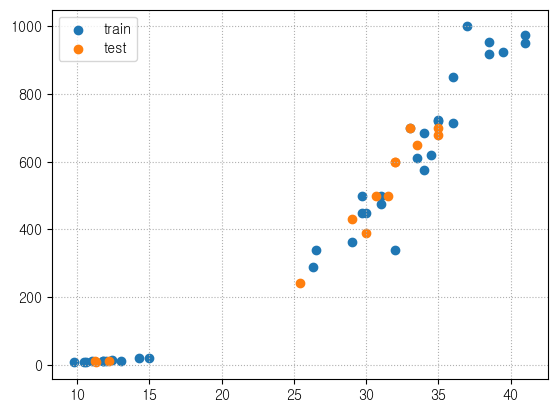

In [59]:
plt.scatter(train_X[:, 0],train_X[:, 1], label = "train")
plt.scatter(test_X[:, 0],test_X[:, 1], label = "test")
plt.legend()
plt.grid(linestyle = ":")
plt.show()

In [72]:
knn = KNeighborsClassifier(
    n_neighbors = 5,
    weights = "uniform", 
    metric = "minkowski",
    p = 3
)

In [73]:
knn.fit(train_X, train_y)
print("Test Acc", knn.score(test_X, test_y))

## 이런 속성같은거 다 외우는게 아니라 인터넷에서 검색해서 필요한 부분을 찾아서 넣어라~
# 검색 자료를 보고 해석하는 능력이 더 중요하다 
# 한글 자료를 보고 영문 자료를 봐라~

print("classes = ", knn.classes_)
print("metrics = ", knn.effective_metric_)
print("sample = ", knn.n_samples_fit_)

Test Acc 1.0
classes =  [0. 1.]
metrics =  minkowski
sample =  36


In [74]:
from sklearn.model_selection import train_test_split

In [80]:
train_X, test_X, train_y, test_y = train_test_split(
    fish_data, fish_target, stratify= fish_target, random_state = 1234
)  
print(train_X)

[[  12.4   13.4]
 [  32.   600. ]
 [  14.3   19.7]
 [  26.3  290. ]
 [  30.   390. ]
 [  37.  1000. ]
 [  33.   700. ]
 [  31.   475. ]
 [  31.5  500. ]
 [  13.    12.2]
 [  15.    19.9]
 [  11.8    9.9]
 [  41.   950. ]
 [  34.   685. ]
 [  25.4  242. ]
 [   9.8    6.7]
 [  30.   450. ]
 [  32.   340. ]
 [  33.5  650. ]
 [  12.2   12.2]
 [  26.5  340. ]
 [  10.5    7.5]
 [  12.     9.8]
 [  29.   430. ]
 [  39.5  925. ]
 [  35.   725. ]
 [  38.5  920. ]
 [  36.   714. ]
 [  29.   363. ]
 [  34.   575. ]
 [  31.   500. ]
 [  10.6    7. ]
 [  41.   975. ]
 [  29.7  500. ]
 [  35.   700. ]
 [  35.   680. ]]


In [84]:
knn = KNeighborsClassifier()
knn.fit(train_X, train_y)
knn.score(test_X, test_y)

1.0

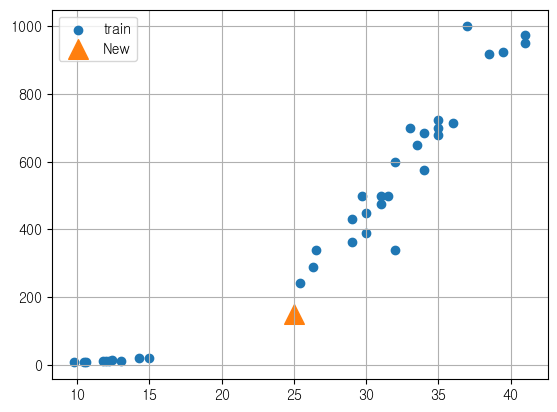

In [89]:
## 
plt.scatter(train_X[:,0], train_X[:, 1], label = "train")
plt.scatter(25, 150, marker = "^", s = 200,  label = "New")
plt.grid()
plt.legend()
plt.show()

In [90]:
knn.predict([[25,150]])
# 주어진 특성 값을 기반으로 새로운 데이터 포인트의 클래스를 예측하는 과정
# 25는 첫번째 특성(길이), 150은 두번째 특성(무게)

array([0.])

In [96]:
knn.kneighbors([[25, 150]])
# kneighbors() : 입력된 데이터 포인트에 대해 k개의 최근접 이웃을 찾는다. 

(array([[ 92.00086956, 130.48375378, 130.73859415, 137.17988191,
         138.32150953]]),
 array([[14, 10,  2,  0,  9]]))

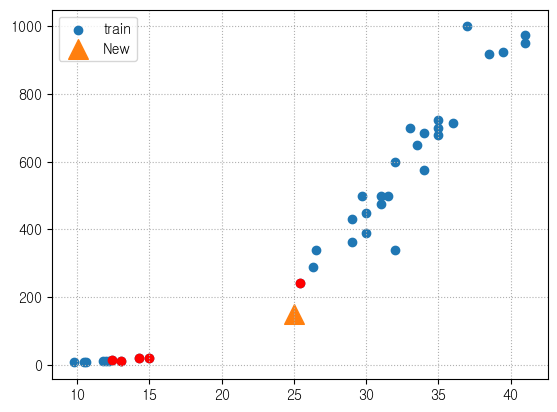

In [101]:
distance, index = knn.kneighbors([[25, 150]])

plt.scatter(train_X[:,0], train_X[:, 1], label = "train")
plt.scatter(25, 150, marker = "^", s = 200,  label = "New")
plt.scatter(train_X[index,0], train_X[index, 1], c = "r")
plt.grid(linestyle = ":")
plt.legend()
plt.show()

# 길이보다 무게에 가중치를 더 많이 두고 있어서 이상하게 나옴
# 그래서 knn은 반드시 표준화해야된다. 


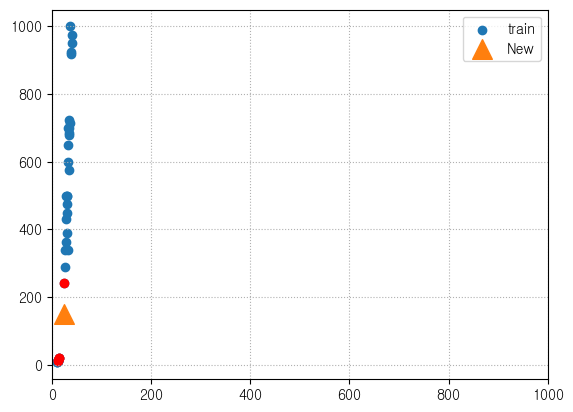

In [103]:
distance, index = knn.kneighbors([[25, 150]])

plt.scatter(train_X[:,0], train_X[:, 1], label = "train")
plt.scatter(25, 150, marker = "^", s = 200,  label = "New")
plt.scatter(train_X[index,0], train_X[index, 1], c = "r")
plt.xlim(0,1000) #x축 범위 바꾸기 
plt.grid(linestyle = ":")
plt.legend()
plt.show()

In [110]:
## 표준화 
mean = np.mean(train_X, axis = 0)
# 길이에대한 평균, 무게에 대한 평균 
std = np.std(train_X, axis = 0)

#스케일링 
train_scaled  = (train_X - np.mean(train_X, axis = 0)) /np.std(train_X, axis = 0)
train_scaled
# train = (train_X = np.mean(train_X, axis = 0) /np.std(train_X, axis = 0))

array([-1.,  1.])

KNN 알고리즘 구현 순서
1. 데이터셋 준비(수집)
2. 데이터 전처리(KNN은 거리 기반 알고리즘으로, 특성의 스케일을 맞추는 것이 중요, 표준화 또는 정규화 사용)(훈련/테스트 데이터 분할)
3. k 값설정 : 일반적으로는 홀수로 설정해서 동점 상황을 피하는 것이 좋음 
4. 모델 훈련 : knn은 훈련 과정이 없으며, 훈련 데이터셋을 메모리에 저장함.
5. 예측 수행 : 새로운 데이터 입력-거리 계산-최근접 이웃 찾기-다수결 투표
6. 모델 평가 : 정확도 정밀도 재현율 f1-score
7. 결과 해석 및 조정
8. 최종 모델 저장 

In [113]:
[25, 150] - 

plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(25,150)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed